<a href="https://colab.research.google.com/github/MenakaRajendran/PortfolioProjects/blob/main/PDA_Creditcard_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT CARD FRAUD DETECTION

## LOADING THE DATASET

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/user/Downloads/JFILES/archive(1)/creditcard_2023.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

##  DATASET OVERVIEW

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Getting basic statistics of numerical features
print(df.describe())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
                  id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486122  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285

## DATA VISUALIZATION AND ANALYSIS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

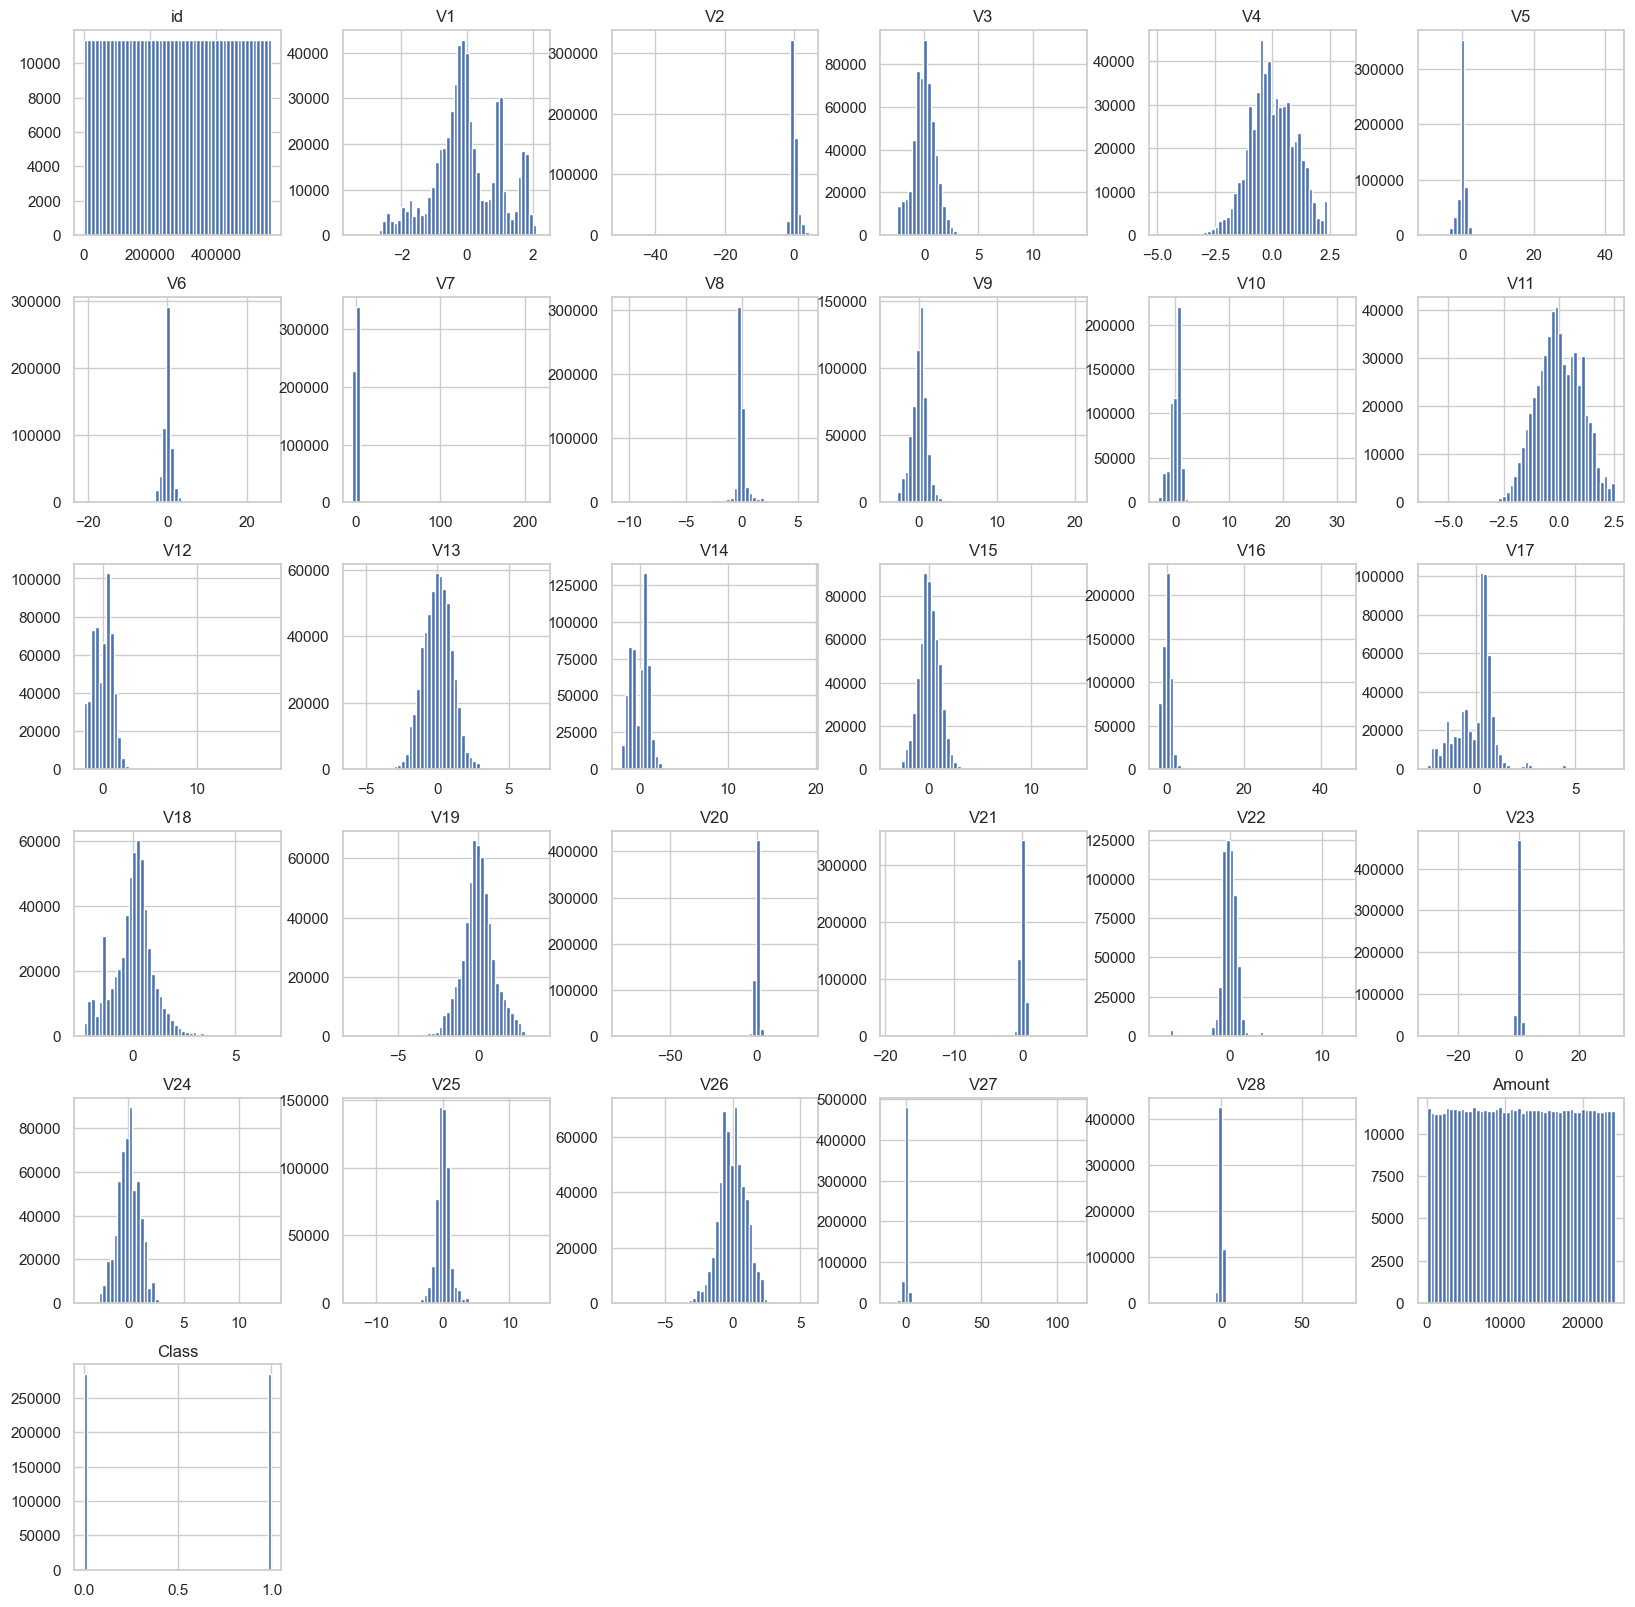

In [ ]:
# Plot histograms for numerical features
df.hist(figsize=(20, 20), bins=50)
plt.show()

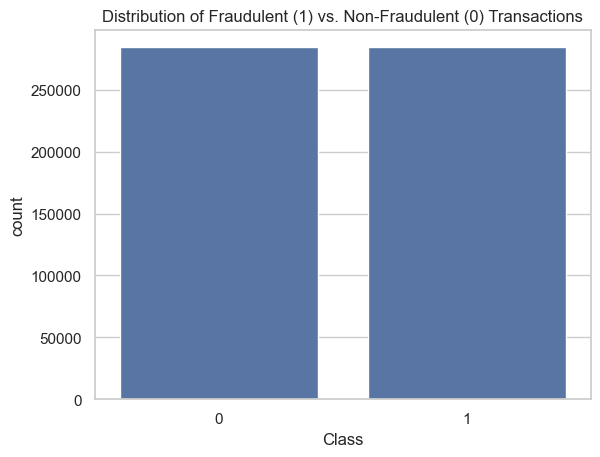

In [ ]:
# Plot the distribution of the target variable (Class)
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent (1) vs. Non-Fraudulent (0) Transactions')
plt.show()

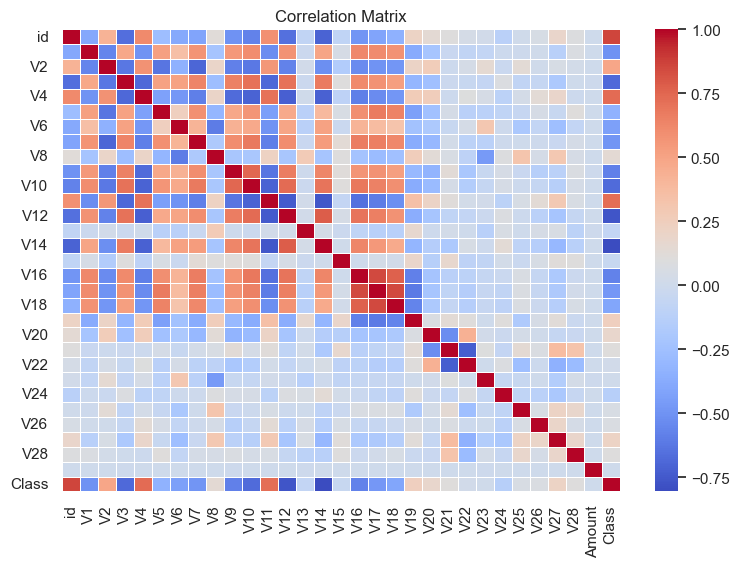

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(9, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## DATA PREPROCESSING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df_sampled = df.sample(n=15000, random_state=42)

# Separate features and target variable
X = df_sampled.drop(columns=['id', 'Class'])
y = df_sampled['Class']

# Scale the 'Amount' feature
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing sets created successfully.")

Training and testing sets created successfully.


## MODELS TRAINING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

models = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {"C": [0.1, 1, 10], "solver": ["liblinear"]}
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {"max_depth": [5, 10, 20], "min_samples_split": [2, 10, 20]}
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {"n_estimators": [100, 200], "max_depth": [5, 10, 20]}
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(),
        "params": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1, 0.2]}
    },
    "SVM": {
        "model": SVC(),
        "params": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {"n_neighbors": [3, 5, 7]}
    },
    "XGBoost": {
        "model": XGBClassifier(),
        "params": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1, 0.2]}
    },
    "Neural Network": {
        "model": MLPClassifier(),
        "params": {"hidden_layer_sizes": [(100,), (50, 50)], "alpha": [0.0001, 0.001]}
    }
}

for model_name, model_info in models.items():
    grid_search = GridSearchCV(model_info["model"], model_info["params"], cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"Model: {model_name}")
    print(f"Best Params: {grid_search.best_params_}")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred)}\n")

Model: Logistic Regression
Best Params: {'C': 10, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1464
           1       0.98      0.95      0.97      1536

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000

ROC-AUC Score: 0.967373206967213

Model: Decision Tree
Best Params: {'max_depth': 5, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1464
           1       0.97      0.95      0.96      1536

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000

ROC-AUC Score: 0.9578744023224044

Model: Random Forest
Best Params: {'max_depth': 20, 'n_estimators': 200}
              precision    recall  f1-score   support



## ADDITIONAL MODEL

In [ ]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier()
catboost_params = {"iterations": [100, 200], "learning_rate": [0.01, 0.1, 0.2]}
catboost_grid = GridSearchCV(catboost_model, catboost_params, cv=5, scoring='roc_auc')
catboost_grid.fit(X_train, y_train)
best_catboost = catboost_grid.best_estimator_
y_pred_catboost = best_catboost.predict(X_test)
print("Model: CatBoost")
print(f"Best Params: {catboost_grid.best_params_}")
print(classification_report(y_test, y_pred_catboost))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_catboost)}\n")

0:	learn: 0.6728781	total: 154ms	remaining: 15.2s
1:	learn: 0.6516779	total: 171ms	remaining: 8.36s
2:	learn: 0.6325849	total: 189ms	remaining: 6.12s
3:	learn: 0.6158480	total: 206ms	remaining: 4.94s
4:	learn: 0.5984950	total: 223ms	remaining: 4.23s
5:	learn: 0.5820421	total: 239ms	remaining: 3.74s
6:	learn: 0.5669788	total: 255ms	remaining: 3.39s
7:	learn: 0.5513987	total: 274ms	remaining: 3.15s
8:	learn: 0.5350471	total: 291ms	remaining: 2.94s
9:	learn: 0.5220347	total: 308ms	remaining: 2.77s
10:	learn: 0.5059391	total: 324ms	remaining: 2.62s
11:	learn: 0.4921183	total: 343ms	remaining: 2.52s
12:	learn: 0.4786139	total: 368ms	remaining: 2.46s
13:	learn: 0.4666300	total: 385ms	remaining: 2.36s
14:	learn: 0.4532339	total: 399ms	remaining: 2.26s
15:	learn: 0.4430061	total: 415ms	remaining: 2.18s
16:	learn: 0.4309336	total: 434ms	remaining: 2.12s
17:	learn: 0.4203913	total: 451ms	remaining: 2.05s
18:	learn: 0.4092471	total: 468ms	remaining: 2s
19:	learn: 0.3998936	total: 483ms	remaining:

## MODEL PERFORMANCE COMPARISON

In [ ]:
import pandas as pd

results = [
    {"Model": "Logistic Regression", "ROC-AUC": 0.967373206967213, "Precision": 0.97, "Recall": 0.97, "F1-Score": 0.97},
    {"Model": "Decision Tree", "ROC-AUC": 0.9578744023224044, "Precision": 0.96, "Recall": 0.96, "F1-Score": 0.96},
    {"Model": "Random Forest", "ROC-AUC": 0.9914884306693988, "Precision": 0.99, "Recall": 0.99, "F1-Score": 0.99},
    {"Model": "Gradient Boosting", "ROC-AUC": 0.9894872780054645, "Precision": 0.99, "Recall": 0.99, "F1-Score": 0.99},
    {"Model": "SVM", "ROC-AUC": 0.9849587605953384, "Precision": 0.99, "Recall": 0.99, "F1-Score": 0.99},
    {"Model": "KNN", "ROC-AUC": 0.9837186219262296, "Precision": 0.98, "Recall": 0.98, "F1-Score": 0.98},
    {"Model": "XGBoost", "ROC-AUC": 0.997022284836656, "Precision": 1.00, "Recall": 1.00, "F1-Score": 1.00},
    {"Model": "Neural Network", "ROC-AUC": 0.995266606889071, "Precision": 1.00, "Recall": 1.00, "F1-Score": 1.00},
    {"Model": "CatBoost", "ROC-AUC": 0.9966327271174863, "Precision": 1.00, "Recall": 1.00, "F1-Score": 1.00}
]

performance_df = pd.DataFrame(results)

# Display the performance comparison
print(performance_df)

                 Model   ROC-AUC  Precision  Recall  F1-Score
0  Logistic Regression  0.967373       0.97    0.97      0.97
1        Decision Tree  0.957874       0.96    0.96      0.96
2        Random Forest  0.991488       0.99    0.99      0.99
3    Gradient Boosting  0.989487       0.99    0.99      0.99
4                  SVM  0.984959       0.99    0.99      0.99
5                  KNN  0.983719       0.98    0.98      0.98
6              XGBoost  0.997022       1.00    1.00      1.00
7       Neural Network  0.995267       1.00    1.00      1.00
8             CatBoost  0.996633       1.00    1.00      1.00
